In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, GRU
from tensorflow.keras.callbacks import History 

#from wordcloud import WordCloud, STOPWORDS

import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

In [7]:
from wordcloud import WordCloud, STOPWORDS

In [8]:
they = pd.read_csv('C:/Users/katya/Fake_News/dataset_they.csv')

In [9]:
real = pd.read_csv("C:/Users/katya/Fake_News/News_dataset/True.csv")
fake = pd.read_csv("C:/Users/katya/Fake_News/News_dataset/Fake.csv")
real['Category'] = 1
fake['Category'] = 0
dataset = pd.concat([real, fake]).reset_index(drop=True)

In [10]:
#they['final_text'] = dataset['title'] + they['text'], already has title in text
they['Category'] = dataset['Category']
dataset['final_text'] = dataset['title'] + dataset['text']
they['text'].head()

0    As U.S. budget fight looms, Republicans flip t...
1    U.S. military to accept transgender recruits o...
2    Senior U.S. Republican senator: 'Let Mr. they ...
3    FBI Russia probe helped by Australian diplomat...
4    Trump wants Postal Service to charge 'much mor...
Name: text, dtype: object

In [11]:
dataset.isnull().sum()
they.isnull().sum()

Unnamed: 0    0
text          0
Labels        0
class         0
Category      0
dtype: int64

In [12]:
##Data Cleaning, PreProcessing
porter_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [13]:
#for dataset
stemmed_text = []
lemmatized_text = []
final_text_result = []
for text in dataset['final_text']:
    result = re.sub('[^a-zA-Z]', ' ', text)
    result = result.lower()
    result = result.split()
    result = [r for r in result if r not in set(stopwords.words('english'))]
    final_text_result.append(" ".join(result))
    stemmed_result = [porter_stemmer.stem(r) for r in result]
    stemmed_text.append(" ".join(stemmed_result))
    lemmatized_result = [lemmatizer.lemmatize(r) for r in result]
    lemmatized_text.append(" ".join(lemmatized_result))

In [14]:
#for no-name dataset
stemmed_text_THEY = []
lemmatized_text_THEY = []
final_text_result_THEY = []
for text in they['text']:
    result = re.sub('[^a-zA-Z]', ' ', text)
    result = result.lower()
    result = result.split()
    result = [r for r in result if r not in set(stopwords.words('english'))]
    final_text_result_THEY.append(" ".join(result))
    stemmed_result = [porter_stemmer.stem(r) for r in result]
    stemmed_text_THEY.append(" ".join(stemmed_result))
    lemmatized_result = [lemmatizer.lemmatize(r) for r in result]
    lemmatized_text_THEY.append(" ".join(lemmatized_result))

In [15]:
print(len(final_text_result))
print(len(stemmed_text))
print(len(lemmatized_text))

print(len(final_text_result_THEY))
print(len(stemmed_text_THEY))
print(len(lemmatized_text_THEY))

44898
44898
44898
44898
44898
44898


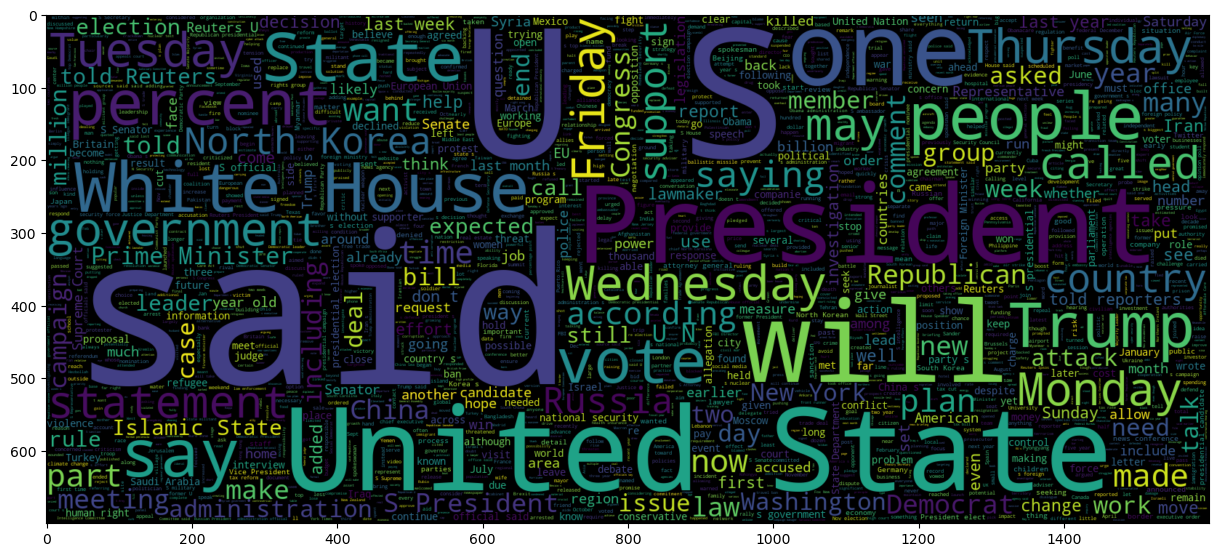

In [16]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(they[they.Category==1].text))
plt.imshow(wc, interpolation="bilinear")
plt.show()

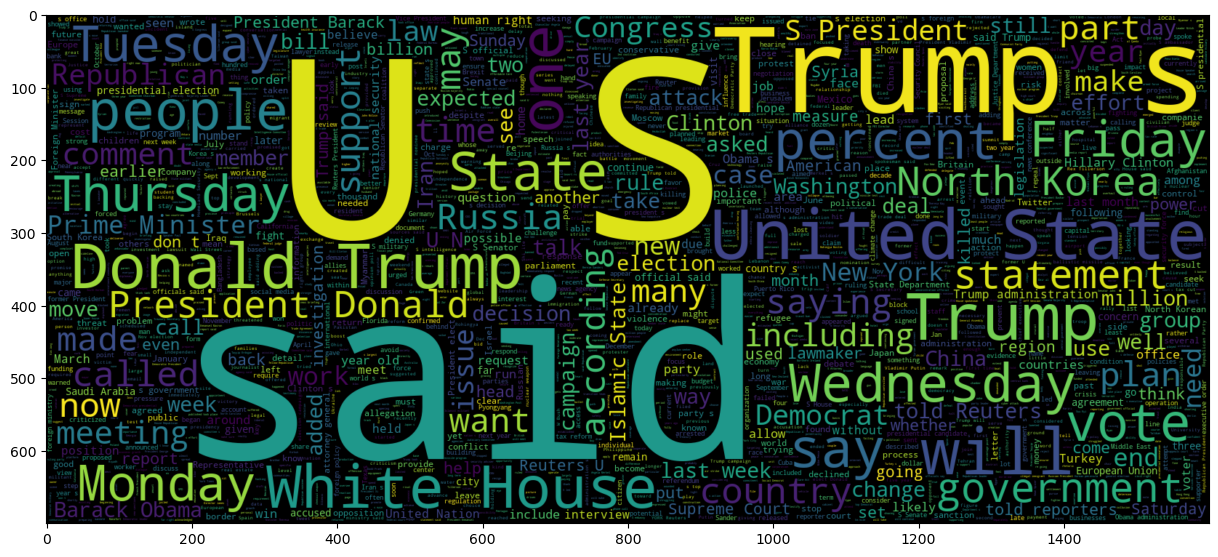

In [17]:
#WordCloud for label=0 -- Fake News
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(dataset[dataset.Category==1].final_text))
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [18]:
winsound.Beep(frequency, duration)

In [19]:
#Create models using CountVectorizer and TFIDF Vectorizer with stemmed text and lemmatized text
def get_prediction(vectorizer, classifier, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('vector', vectorizer),
                    ('model', classifier)])
    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    print("Classification Report: \n", classification_report(y_test, y_pred))

In [20]:
#Using One Hot vector and LSTM model
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras 
from tensorflow.keras.preprocessing.sequence import pad_sequences

keras.__version__
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import one_hot

2.3.0


In [21]:
#Using One hot representation using Stemmed Text
voc_size = 5000
onehot_stemmed_text = [one_hot(word, voc_size) for word in stemmed_text]
print(len(onehot_stemmed_text))
onehot_stemmed_text[0]

onehot_stemmed_text_THEY = [one_hot(word, voc_size) for word in stemmed_text_THEY]
print(len(onehot_stemmed_text_THEY))
onehot_stemmed_text_THEY[0]

44898
44898


[1251,
 3081,
 1242,
 2887,
 366,
 2163,
 3248,
 3391,
 1466,
 898,
 2544,
 366,
 3631,
 1251,
 1100,
 3967,
 295,
 1934,
 4679,
 902,
 4778,
 4012,
 4052,
 4411,
 2763,
 3248,
 2544,
 2866,
 4423,
 3081,
 1901,
 1584,
 2575,
 2688,
 974,
 2709,
 366,
 1251,
 3831,
 2853,
 4575,
 2564,
 902,
 4628,
 314,
 776,
 3959,
 2519,
 1630,
 2085,
 4813,
 4374,
 3456,
 1403,
 329,
 1630,
 3909,
 3412,
 2514,
 3959,
 3081,
 1242,
 1741,
 1578,
 456,
 839,
 1624,
 1631,
 2746,
 2590,
 3237,
 2512,
 4036,
 366,
 4685,
 1584,
 2866,
 1100,
 2059,
 366,
 985,
 2655,
 3081,
 1802,
 710,
 2519,
 2624,
 533,
 985,
 1495,
 1802,
 4287,
 1822,
 2497,
 2519,
 4095,
 1066,
 2231,
 2277,
 2021,
 882,
 146,
 3798,
 2312,
 3865,
 4364,
 4962,
 667,
 4836,
 1881,
 220,
 1802,
 4287,
 1822,
 2497,
 2519,
 3939,
 4667,
 4357,
 3297,
 513,
 768,
 3740,
 271,
 4095,
 2624,
 1881,
 1324,
 4195,
 1123,
 2193,
 4012,
 4938,
 3939,
 3248,
 2544,
 4856,
 2556,
 3664,
 4036,
 2001,
 1999,
 271,
 2709,
 366,
 3967,
 4380,

In [22]:
sent_length = 400
embedded_text = pad_sequences(onehot_stemmed_text, padding='pre', maxlen=sent_length)
print(embedded_text)

embedded_text_THEY = pad_sequences(onehot_stemmed_text_THEY, padding='pre', maxlen=sent_length)
print(embedded_text_THEY)

[[ 776 3959 2519 ... 4735 3967 3302]
 [   0    0    0 ... 1977 4128  241]
 [   0    0    0 ... 4091 1122  271]
 ...
 [3691   98  830 ... 4141  390  490]
 [   0    0    0 ... 4141 2215   73]
 [3302 3662 2377 ... 4141 4453  490]]
[[1901 1584 2575 ... 4735 3967 3302]
 [   0    0    0 ... 1977 4128  241]
 [   0    0    0 ... 4091 1122  271]
 ...
 [4157  970 4812 ... 4141  390  490]
 [   0    0    0 ... 4141 2215   73]
 [ 513 4411 2638 ... 4141 4453  490]]


In [23]:
X_final = np.array(embedded_text)
y_final = dataset['Category']

X_finalT = np.array(embedded_text_THEY)
y_finalT = they['Category']

In [24]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='auto')

In [25]:
#Using One hot representation using Lemmatized Text
voc_size = 5000
onehot_lemmatized_text = [one_hot(word, voc_size) for word in lemmatized_text]
print(len(onehot_lemmatized_text))
onehot_lemmatized_text[0]

onehot_lemmatized_text_THEY = [one_hot(word, voc_size) for word in lemmatized_text_THEY]
print(len(onehot_lemmatized_text_THEY))
onehot_lemmatized_text_THEY[0]

44898
44898


[1251,
 3081,
 1242,
 2887,
 366,
 2163,
 3248,
 3391,
 713,
 898,
 1992,
 366,
 3631,
 1251,
 1100,
 4557,
 295,
 1934,
 2997,
 20,
 4778,
 4012,
 4052,
 4411,
 2497,
 3248,
 1992,
 2866,
 1376,
 3081,
 1901,
 895,
 2575,
 2688,
 974,
 2709,
 366,
 1251,
 57,
 495,
 4082,
 2564,
 902,
 4628,
 314,
 776,
 366,
 2536,
 162,
 2952,
 4393,
 2708,
 3456,
 1403,
 329,
 162,
 3909,
 1303,
 4667,
 366,
 3081,
 1242,
 3614,
 2924,
 1898,
 4288,
 399,
 1631,
 1062,
 1316,
 1221,
 2512,
 4036,
 366,
 4685,
 1584,
 2866,
 1100,
 234,
 366,
 985,
 2655,
 3081,
 4138,
 2410,
 2536,
 2624,
 533,
 985,
 2641,
 4138,
 4287,
 2845,
 4120,
 2536,
 4095,
 1066,
 432,
 2087,
 2021,
 3732,
 146,
 3798,
 909,
 1765,
 4364,
 4129,
 2973,
 3284,
 1881,
 3618,
 4138,
 4287,
 2845,
 4120,
 2536,
 3939,
 4667,
 4357,
 4525,
 3739,
 768,
 3307,
 271,
 4095,
 2624,
 3090,
 1324,
 4195,
 1123,
 2757,
 4012,
 3765,
 3939,
 3248,
 1992,
 4856,
 37,
 3194,
 4036,
 3299,
 1999,
 271,
 2709,
 366,
 4557,
 4380,
 432,
 7

In [26]:
sent_length = 400
embedded_text = pad_sequences(onehot_lemmatized_text, padding='pre', maxlen=sent_length)
print(embedded_text)

embedded_text_THEY = pad_sequences(onehot_lemmatized_text_THEY, padding='pre', maxlen=sent_length)
print(embedded_text_THEY)

[[ 776  366 2536 ... 4735 4557 3302]
 [   0    0    0 ... 3744 4128  874]
 [   0    0    0 ... 1251 4176  271]
 ...
 [3691   98  830 ... 4141  390  490]
 [   0    0    0 ... 4141 2215   73]
 [3452 3662 2377 ... 4141 4453  490]]
[[1901  895 2575 ... 4735 4557 3302]
 [   0    0    0 ... 3744 4128  874]
 [   0    0    0 ... 1251 4176  271]
 ...
 [4157  970 3631 ... 4141  390  490]
 [   0    0    0 ... 4141 2215   73]
 [3739 4411 2638 ... 4141 4453  490]]


In [27]:
X_final = np.array(embedded_text)
y_final = dataset['Category']

X_finalT = np.array(embedded_text_THEY)
y_finalT = they['Category']

In [28]:
#Using Glove Vectors and LSTM, GRU Models
X_final = np.array(final_text_result)
y_final = dataset['Category']

X_finalT = np.array(final_text_result_THEY)
y_finalT = they['Category']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.3, random_state = 0)
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X_finalT, y_finalT, test_size = 0.3, random_state = 0)

In [30]:
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import one_hot

In [31]:
max_words = 10000
#make sure import text on first cell
tokenizer = text.Tokenizer(num_words=max_words)

In [32]:
tokenizer.fit_on_texts(X_train)

In [33]:
# Generate sequence of Tokens
X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)

X_train_sequence_THEY = tokenizer.texts_to_sequences(X_trainT)
X_test_sequence_THEY = tokenizer.texts_to_sequences(X_testT)

In [34]:
# Pad the sequences
X_train_pad = sequence.pad_sequences(X_train_sequence, maxlen=sent_length)
X_test_pad = sequence.pad_sequences(X_test_sequence, maxlen=sent_length)

X_train_pad_THEY = sequence.pad_sequences(X_train_sequence_THEY, maxlen=sent_length)
X_test_pad_THEY = sequence.pad_sequences(X_test_sequence_THEY, maxlen=sent_length)

In [35]:
word_index = tokenizer.word_index

In [36]:
print("Train Text:", X_train[0])
print("\nSequence before padding: ", X_train_sequence[0])
print("\nSequence after padding: ", X_train_pad[0])

print("Train Text. THEY:", X_trainT[0])
print("\nSequence before padding. THEY: ", X_train_sequence_THEY[0])
print("\nSequence after padding. THEY: ", X_train_pad_THEY[0])

Train Text: breaking finally new wikileaks email going dump emails latest wikileaks email evidence smoke hillary concerned places middle fire fbi finally take appropriate actions give hillary treatment every american would receive caught major cover destruction evidence subpoena hacker friendly private email servers appear penetrated foreign intelligence agencies clinton company aaron burr bradley manning edward snowden betrayed public trust failure hold accountable yet proof clintons law matter legal system always treats kid gloves frontpagein today th wikileaks release hacked podesta emails one notable highlights march exchange john podesta clinton aide cheryl mills clinton campaign chair says another matter sound like lanny going dump emails email may indicate intent sent days nyt story revealing existence hillary email server hillary press conference addressing time stunning revelation personal email account server home mills response think got new nick name unclear lanny referred 

In [37]:
#word embeddings using glove vectors
GLOVE_EMBEDDINGS_FILE = "C:/Users/katya/Fake_News/glove.twitter.27B.100d.txt"

In [38]:
%%time
embedding_vectors = {}
with open(GLOVE_EMBEDDINGS_FILE,'r',encoding='utf-8') as file:
    for row in file:
        values = row.split(' ')
        word = values[0]
        weights = np.asarray([float(val) for val in values[1:]])
        embedding_vectors[word] = weights
print("Size of vocabulary in GloVe: ", len(embedding_vectors))

embedding_vectors_THEY = {}
with open(GLOVE_EMBEDDINGS_FILE,'r',encoding='utf-8') as file:
    for row in file:
        values = row.split(' ')
        word = values[0]
        weights = np.asarray([float(val) for val in values[1:]])
        embedding_vectors_THEY[word] = weights
print("Size of vocabulary in GloVe: ", len(embedding_vectors_THEY))

Size of vocabulary in GloVe:  1193514
Size of vocabulary in GloVe:  1193514
Wall time: 1min 25s


In [39]:
#Create embedding matrix
#initialize the embedding_matrix with zeros
emb_dim = 100
if max_words is not None: 
    vocab_len = max_words 
else:
    vocab_len = len(word_index)+1
embedding_matrix = np.zeros((vocab_len, emb_dim))
oov_count = 0
oov_words = []
for word, idx in word_index.items():
    if idx < vocab_len:
        embedding_vector = embedding_vectors.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
        else:
            oov_count += 1 
            oov_words.append(word)
#print some of the out of vocabulary words
print("Out of vocabulary words: ", oov_words[0:5])
print("{} out of {} words are Out of Vocabulary".format(str(oov_count), str(vocab_len)))

Out of vocabulary words:  ['realdonaldtrump', 'tillerson', 'brexit', 'manafort', 'gorsuch']
124 out of 10000 words are Out of Vocabulary


In [40]:
#THEY
if max_words is not None: 
    vocab_len = max_words 
else:
    vocab_len = len(word_index)+1
embedding_matrix_THEY = np.zeros((vocab_len, emb_dim))
oov_count = 0
oov_words = []
for word, idx in word_index.items():
    if idx < vocab_len:
        embedding_vector_THEY = embedding_vectors_THEY.get(word)
        if embedding_vector_THEY is not None:
            embedding_matrix_THEY[idx] = embedding_vector_THEY
        else:
            oov_count += 1 
            oov_words.append(word)
#print some of the out of vocabulary words
print("Out of vocabulary words: ", oov_words[0:5])
print("{} out of {} words are Out of Vocabulary".format(str(oov_count), str(vocab_len)))

Out of vocabulary words:  ['realdonaldtrump', 'tillerson', 'brexit', 'manafort', 'gorsuch']
124 out of 10000 words are Out of Vocabulary


In [41]:
#LSTM
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
lstm_model.add(LSTM(128, return_sequences=False))
# lstm_model.add(Dropout(0.25))
lstm_model.add(Dense(1, activation = 'sigmoid')) 
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,117,377
Trainable params: 117,377
Non-trainable params: 1,000,000
_________________________________________________________________
None


In [42]:
%%time
seq_model1 = lstm_model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=20, batch_size = 256, callbacks=([reduce_lr, early_stop]))

Epoch 1/20
123/123 [==============================] - 154s 1s/step - loss: 0.2903 - accuracy: 0.8773 - val_loss: 0.1529 - val_accuracy: 0.9413
Epoch 2/20
123/123 [==============================] - 295s 2s/step - loss: 0.1734 - accuracy: 0.9374 - val_loss: 0.2387 - val_accuracy: 0.9065
Epoch 3/20
123/123 [==============================] - 177s 1s/step - loss: 0.2521 - accuracy: 0.8997 - val_loss: 0.1427 - val_accuracy: 0.9468
Epoch 4/20
123/123 [==============================] - 176s 1s/step - loss: 0.2095 - accuracy: 0.9168 - val_loss: 0.1262 - val_accuracy: 0.9546
Epoch 5/20
123/123 [==============================] - 175s 1s/step - loss: 0.1031 - accuracy: 0.9639 - val_loss: 0.0823 - val_accuracy: 0.9735
Epoch 6/20
123/123 [==============================] - 176s 1s/step - loss: 0.0956 - accuracy: 0.9668 - val_loss: 0.0808 - val_accuracy: 0.9720
Epoch 7/20
123/123 [==============================] - 173s 1s/step - loss: 0.1152 - accuracy: 0.9622 - val_loss: 0.0950 - val_accuracy: 0.9681

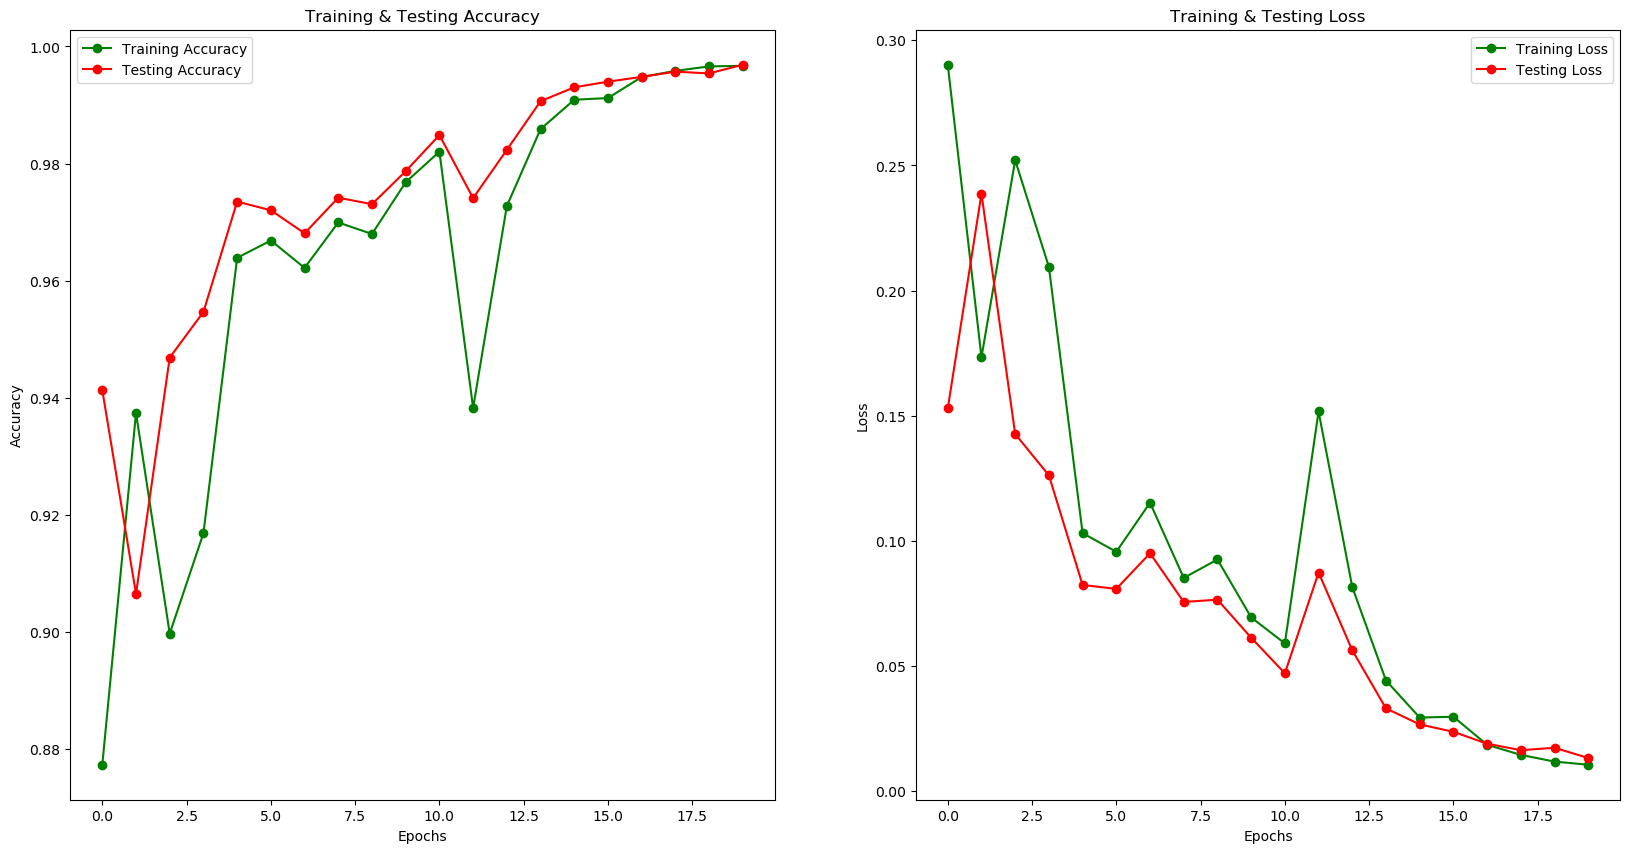

In [43]:
#evaluate model
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = seq_model1.history['accuracy']
train_loss = seq_model1.history['loss']
val_acc = seq_model1.history['val_accuracy']
val_loss = seq_model1.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [44]:
train_lstm_results = lstm_model.evaluate(X_train_pad, y_train, verbose=0, batch_size=256)
test_lstm_results = lstm_model.evaluate(X_test_pad_THEY, y_testT, verbose=0, batch_size=256)
print("Train accuracy: {}".format(train_lstm_results[1]*100))
print("Test accuracy: {}".format(test_lstm_results[1]*100))

Train accuracy: 99.77408647537231
Test accuracy: 99.59168434143066


In [45]:
y_pred2 = lstm_model.predict(X_train_pad)
y_pred = np.round(y_pred2).astype(int)
print("Accuarcy: {}".format(round(accuracy_score(y_train, y_pred)*100,2)))

Accuarcy: 99.77


In [46]:
y_pred1 = lstm_model.predict(X_test_pad)
y_pred = np.round(y_pred1).astype(int)
print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

Accuarcy: 99.69


In [47]:
y_pred0 = lstm_model.predict(X_test_pad_THEY)
y_pred = np.round(y_pred0).astype(int)
print("Accuarcy: {}".format(round(accuracy_score(y_testT, y_pred)*100,2)))

Accuarcy: 99.59


In [48]:
print(np.average(y_pred2))
print(np.average(y_pred1))
print(np.average(y_pred0))

0.4776213
0.47587857
0.47721767


In [49]:
y_pred0 is y_pred1

False

In [50]:
y_pred1

array([[8.6587667e-04],
       [6.6328892e-07],
       [7.8421147e-07],
       ...,
       [4.0731953e-07],
       [9.9975860e-01],
       [9.9738288e-01]], dtype=float32)

In [51]:
y_pred0

array([[7.9220533e-04],
       [8.3477130e-07],
       [1.6364116e-06],
       ...,
       [3.6185554e-07],
       [9.9975455e-01],
       [9.9747223e-01]], dtype=float32)

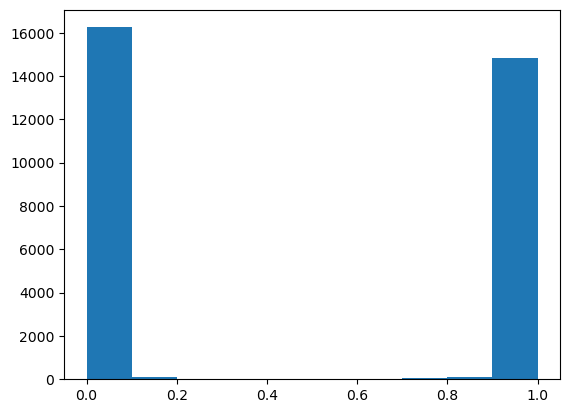

In [52]:
plt.hist(y_pred2)
plt.show()

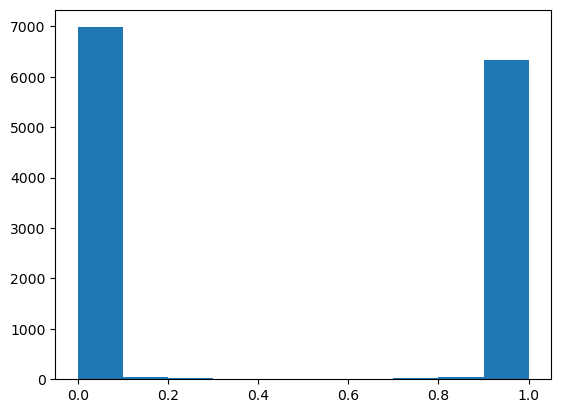

In [53]:
plt.hist(y_pred1)
plt.show()

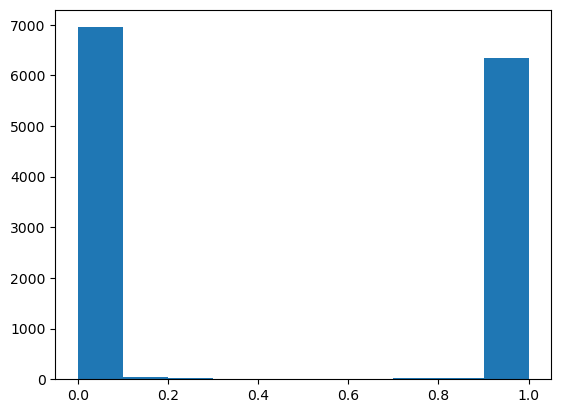

In [54]:
plt.hist(y_pred0)
plt.show()
#true from 0.8 to 1, probability, histogram

In [ ]:
X_test_pad_THEY

In [ ]:
X_train_pad

In [ ]:
len(X_test_sequence_THEY)

In [ ]:
cm = confusion_matrix(y_testT, y_pred)
print("Confusion Matrix: \n", cm)

In [ ]:
print("Classification Report: \n", classification_report(y_testT, y_pred))

In [ ]:
#GRU
emb_dim = embedding_matrix.shape[1] #technically also embedding matrix THEY
gru_model = Sequential()
gru_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix])) #technically also embedding matrix THEY 
gru_model.add(GRU(128, return_sequences=False))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(1, activation = 'sigmoid'))
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(gru_model.summary())

In [ ]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

In [ ]:
print(theNotebook)

In [ ]:
import os, datetime, tensorflow.keras
logname = "logs-" + theNotebook
logdir = os.path.join(logname, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1, write_graph=True, write_images=True)

In [ ]:
%%time
seq_model2 = gru_model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=20, batch_size = 256, callbacks=([tensorboard, reduce_lr, early_stop]))

In [ ]:
#evaluate model
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = seq_model2.history['accuracy']
train_loss = seq_model2.history['loss']
val_acc = seq_model2.history['val_accuracy']
val_loss = seq_model2.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
train_gru_results = gru_model.evaluate(X_train_pad, y_train, verbose=0, batch_size=256)
test_gru_results = gru_model.evaluate(X_test_pad_THEY, y_testT, verbose=0, batch_size=256)
print("Train accuracy: {}".format(train_gru_results[1]*100))
print("Test accuracy: {}".format(test_gru_results[1]*100))

In [ ]:
y_pred0 = gru_model.predict(X_test_pad_THEY)
y_pred = np.round(y_pred0).astype(int)
print("Accuarcy: {}".format(round(accuracy_score(y_testT, y_pred)*100,2)))

In [ ]:
cm = confusion_matrix(y_testT, y_pred)
print("Confusion Matrix: \n", cm)

In [ ]:
print("Classification Report: \n", classification_report(y_testT, y_pred))